In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
import os

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'audio_features_data.json'  # json 파일의 이름이 실제 파일 이름과 일치해야 합니다

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 분위기 레이블: 예시로 3개의 레이블을 부여 (각 노래에 실제 레이블을 할당해야 합니다)
# 예시 레이블, 실제 데이터에 맞게 수정하세요
# anger, disgust, fear, joy, neutral, sadness, surprise
num_samples = len(data)
# 0: anger, 1: disgust, 2: fear, 3: joy, 4: neutral, 5: sadness, 6: surprise 
labels = [0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54

Data is longer. Truncating data to match label length.


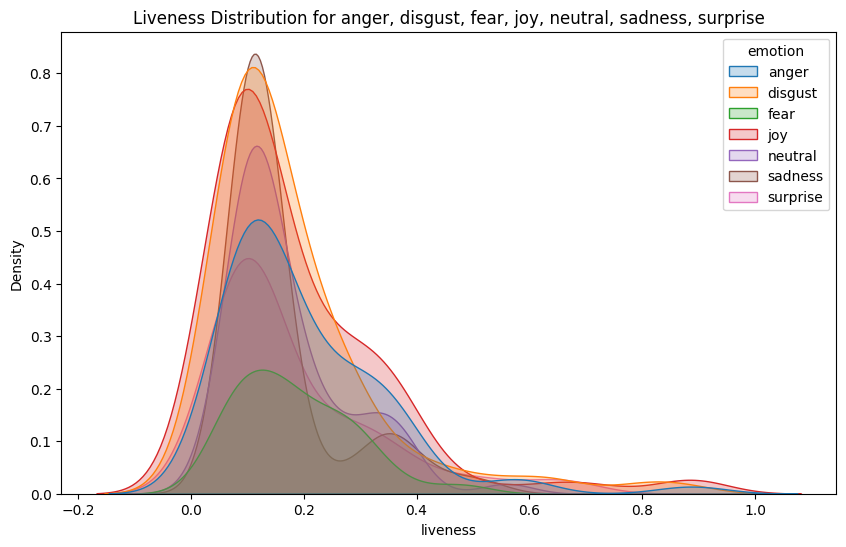

In [21]:
import torch
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'audio_features_data.json'  # json 파일의 이름이 실제 파일 이름과 일치해야 합니다

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# labels 배열이 정의되지 않았다면 정의
labels = [0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54

# 데이터와 레이블 길이 맞추기
if len(data) > len(labels):
    print("Data is longer. Truncating data to match label length.")
    data = data[:len(labels)]
elif len(data) < len(labels):
    print("Labels are longer. Truncating labels to match data length.")
    labels = labels[:len(data)]

# emotion 레이블 추가
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
audio_features_df = pd.DataFrame(data, columns=['tempo', 'valence', 'energy', 'danceability', 'acousticness', 'speechiness', 'liveness'])
audio_features_df['emotion'] = [emotion_labels[label] for label in labels]

# 시각화 함수 정의
def visualize_emotion_feature(emotions_to_visualize, feature):
    filtered_df = audio_features_df[audio_features_df['emotion'].isin(emotions_to_visualize)]
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=filtered_df, x=feature, hue='emotion', fill=True)
    plt.title(f'{feature.capitalize()} Distribution for {", ".join(emotions_to_visualize)}')
    plt.show()

# 감정 및 피처 선택 후 시각화
emotions_to_visualize = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]  # 시각화할 감정
feature = 'liveness'  # 시각화할 피처
visualize_emotion_feature(emotions_to_visualize, feature)


In [19]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'audio_features_data.json'  # json 파일의 경로

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 2. 피처 스케일링 (정규화)
scaler = MinMaxScaler()  # 0과 1 사이로 모든 피처를 정규화
normalized_data = scaler.fit_transform(data)

# 3. 레이블 설정
# 예시로 감정 레이블을 정의함 (실제 데이터에 맞게 수정)
labels = np.array([0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54)

# 4. 커스텀 데이터셋 정의
class AudioFeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# 5. 데이터셋 및 DataLoader 생성
dataset = AudioFeatureDataset(normalized_data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 6. 간단한 신경망 모델 정의 (여기서 MLP 사용)
class AudioEmotionClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AudioEmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 7. 모델 초기화 및 학습 설정
input_size = normalized_data.shape[1]  # 피처 개수
hidden_size = 64  # 은닉층의 크기
num_classes = 7  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. 모델 학습
num_epochs = 300

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')

print("Training completed.")

# 9. 모델 저장
model_save_path = 'audio_emotion_classifier.pth'  # 모델을 저장할 경로
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# 10. 저장된 모델 불러오기 (필요할 때)
loaded_model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()  # 모델을 평가 모드로 전환
print("Model loaded and ready for inference.")


Epoch [1/300], Loss: 1.9596
Epoch [2/300], Loss: 1.9081
Epoch [3/300], Loss: 1.8781
Epoch [4/300], Loss: 1.8194
Epoch [5/300], Loss: 1.8217
Epoch [6/300], Loss: 1.8043
Epoch [7/300], Loss: 1.7932
Epoch [8/300], Loss: 1.7577
Epoch [9/300], Loss: 1.7612
Epoch [10/300], Loss: 1.6975
Epoch [11/300], Loss: 1.6979
Epoch [12/300], Loss: 1.6454
Epoch [13/300], Loss: 1.6600
Epoch [14/300], Loss: 1.6435
Epoch [15/300], Loss: 1.6089
Epoch [16/300], Loss: 1.6066
Epoch [17/300], Loss: 1.5918
Epoch [18/300], Loss: 1.6618
Epoch [19/300], Loss: 1.5674
Epoch [20/300], Loss: 1.5941
Epoch [21/300], Loss: 1.5360
Epoch [22/300], Loss: 1.5607
Epoch [23/300], Loss: 1.5545
Epoch [24/300], Loss: 1.5199
Epoch [25/300], Loss: 1.5088
Epoch [26/300], Loss: 1.5119
Epoch [27/300], Loss: 1.4856
Epoch [28/300], Loss: 1.4879
Epoch [29/300], Loss: 1.5228
Epoch [30/300], Loss: 1.4854
Epoch [31/300], Loss: 1.4922
Epoch [32/300], Loss: 1.4453
Epoch [33/300], Loss: 1.4703
Epoch [34/300], Loss: 1.4316
Epoch [35/300], Loss: 1

# 생성한 모델 써보기. 아무 플레이리스트나 넣어보시오

In [19]:
import torch
import torch.nn as nn
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from sklearn.preprocessing import MinMaxScaler

# Spotify API 인증 설정
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="0f9a6c744c494cba948ec67949d9158c",       # Spotify에서 발급받은 Client ID
    client_secret="bdaffd4b3d514ee48aae9842ecffa0cf" # Spotify에서 발급받은 Client Secret
))

# 플레이리스트 ID를 통해 트랙 ID 가져오는 함수
def get_playlist_track_ids(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    
    track_ids = []
    
    # 플레이리스트 내 모든 트랙의 ID를 track_ids 리스트에 추가
    for item in tracks:
        track = item['track']
        track_ids.append(track['id'])
    
    return track_ids

# 필요한 오디오 피쳐를 가져오는 함수
def get_selected_audio_features(track_id):
    features = sp.audio_features(track_id)
    if features and features[0]:  # features[0]이 None이 아닌 경우
        audio_features = features[0]
        # 7가지 피쳐를 리스트 형태로 추출
        selected_features = [
            audio_features['tempo'],
            audio_features['valence'],
            audio_features['energy'],
            audio_features['danceability'],
            audio_features['acousticness'],
            audio_features['speechiness'],
            audio_features['liveness']
        ]
        return selected_features
    return None

# 트랙 ID를 통해 노래 제목 가져오기
def get_track_name(track_id):
    track_info = sp.track(track_id)
    if track_info:
        return track_info['name']
    return None

# 여러 트랙에 대해 오디오 피처를 가져와 new_audio_features에 저장
def process_tracks_for_prediction(track_ids):
    all_features = []
    track_names = []
    
    for track_id in track_ids:
        try:
            track_name = get_track_name(track_id)
            if not track_name:
                print(f"트랙 이름을 가져올 수 없습니다: {track_id}")
                continue
            
            selected_features = get_selected_audio_features(track_id)
            if selected_features:
                print(f"트랙 {track_name}의 오디오 피쳐가 업데이트되었습니다.")
                all_features.append(selected_features)  # 각 트랙의 피처 추가
                track_names.append(track_name)  # 트랙 이름 저장
            else:
                print(f"해당 트랙에 대한 오디오 피쳐를 가져올 수 없습니다: {track_name} ({track_id})")
        except Exception as e:
            print(f"오류 발생: {e} (트랙 ID: {track_id})")
    
    return np.array(all_features), track_names  # 여러 트랙의 피처와 이름 반환

# 예시 플레이리스트 ID
playlist_id = '4Q1tsQS1elpTPv99JAj8b6'

# 플레이리스트에 담긴 트랙 ID 가져오기
track_ids = get_playlist_track_ids(playlist_id)

# 100개 트랙의 오디오 피처 가져오기
new_audio_features, track_names = process_tracks_for_prediction(track_ids)

# 1. 스케일러 초기화 및 학습
scaler = MinMaxScaler()
scaler.fit(new_audio_features)

# 2. 학습된 스케일러를 사용해 데이터를 정규화
normalized_audio_features = scaler.transform(new_audio_features)

# 모델 불러오기
input_size = normalized_audio_features.shape[1]
hidden_size = 64  # 은닉층 크기
num_classes = 7  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load('audio_emotion_classifier.pth'))
model.eval()

# 각 노래에 대해 감정 예측
for i, features in enumerate(normalized_audio_features):
    new_audio_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # 1차원 배열을 배치로 변환
    prediction = model(new_audio_tensor)
    predicted_label = torch.argmax(prediction).item()
    
    print(f"{i+1}번째 Track: {track_names[i]}, Predicted Emotion Label: {predicted_label}")


트랙 VVS (Feat. JUSTHIS) (Prod. GroovyRoom)의 오디오 피쳐가 업데이트되었습니다.
트랙 IndiGO의 오디오 피쳐가 업데이트되었습니다.
트랙 The Roots (Feat. JUSTHIS) (Prod. GroovyRoom)의 오디오 피쳐가 업데이트되었습니다.
트랙 Gone의 오디오 피쳐가 업데이트되었습니다.
트랙 I'm Sick (Band Ver.) (Feat. Young B, YUNHWAY, Lil tachi, Han Yo Han, JUSTHIS, Swings)의 오디오 피쳐가 업데이트되었습니다.
트랙 Beggar (Feat. YUNHWAY, Jhnovr, JUSTHIS)의 오디오 피쳐가 업데이트되었습니다.
트랙 MOMM (Prod. by CODE KUNST)의 오디오 피쳐가 업데이트되었습니다.
트랙 Diablo의 오디오 피쳐가 업데이트되었습니다.
트랙 JOHN CENA (Feat. BILL STAX)의 오디오 피쳐가 업데이트되었습니다.
트랙 The Beauty of Void (Feat. Jessi, JUSTHIS) (Prod. GroovyRoom)의 오디오 피쳐가 업데이트되었습니다.
트랙 I Could Do Dead (feat. JUSTHIS)의 오디오 피쳐가 업데이트되었습니다.
트랙 Hero (Feat. JUSTHIS, Golden) (Prod. GroovyRoom)의 오디오 피쳐가 업데이트되었습니다.
트랙 One of Them (feat. JUSTHIS, EK)의 오디오 피쳐가 업데이트되었습니다.
트랙 G+Jus Freestyle (Prod. GroovyRoom) [From "Show Me The Money 9 Special"]의 오디오 피쳐가 업데이트되었습니다.
트랙 Junk Flavor의 오디오 피쳐가 업데이트되었습니다.
트랙 Take It의 오디오 피쳐가 업데이트되었습니다.
트랙 Business class (feat. JUSTHIS)의 오디오 피쳐가 업데이트되었습니다.
트랙 Mirror (Prod. by GroovyRoo